Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


Data Collection & Pre-Processing

In [2]:
import pandas as pd
from google.colab import files
Data = files.upload()

Saving mail_data.csv to mail_data.csv


In [3]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [4]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [8]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [9]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [14]:
# Transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [15]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [16]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the Model

Logistic Regression

In [17]:
model = LogisticRegression()

In [18]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [19]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [20]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [21]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


In [23]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()

# Train the Naive Bayes model with the training data
nb_model.fit(X_train_features, Y_train)

# Prediction on training data
nb_prediction_on_training_data = nb_model.predict(X_train_features)
nb_accuracy_on_training_data = accuracy_score(Y_train, nb_prediction_on_training_data)
print('Naive Bayes - Accuracy on training data : ', nb_accuracy_on_training_data)

# Prediction on test data
nb_prediction_on_test_data = nb_model.predict(X_test_features)
nb_accuracy_on_test_data = accuracy_score(Y_test, nb_prediction_on_test_data)
print('Naive Bayes - Accuracy on test data : ', nb_accuracy_on_test_data)

# Assuming 'input_data_features' is derived from 'X_test_features'
# Replace this with the actual code to prepare 'input_data_features'
input_data_features = X_test_features[0]

# Making prediction on new mail
nb_prediction = nb_model.predict(input_data_features)
print(nb_prediction)

if (nb_prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Naive Bayes - Accuracy on training data :  0.9807045097599282
Naive Bayes - Accuracy on test data :  0.9730941704035875
[0]
Spam mail


Building a Predictive System

In [24]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [25]:
# Assuming you have trained your models as follows:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)

# Define the evaluate_model function
def evaluate_model(model, X_train_features, X_test_features, Y_train, Y_test):
    # Prediction on training data
    prediction_on_training_data = model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
    print('Accuracy on training data : ', accuracy_on_training_data)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
    print('Accuracy on test data : ', accuracy_on_test_data)


# Now, evaluate both models
print("\nLogistic Regression Evaluation:")
evaluate_model(model, X_train_features, X_test_features, Y_train, Y_test)

print("\nNaive Bayes Evaluation:")
evaluate_model(nb_model, X_train_features, X_test_features, Y_train, Y_test)



Logistic Regression Evaluation:
Accuracy on training data :  0.9670181736594121
Accuracy on test data :  0.9659192825112107

Naive Bayes Evaluation:
Accuracy on training data :  0.9807045097599282
Accuracy on test data :  0.9730941704035875


Class Distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64


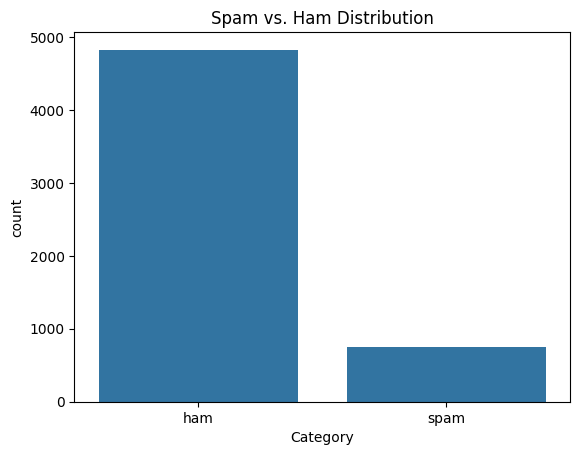


Logistic Regression Evaluation:
Accuracy on training data: 0.9670181736594121
Accuracy on test data: 0.9659192825112107
Precision: 0.9619238476953907
Recall: 1.0
F1-Score: 0.9805924412665985
ROC-AUC Score: 0.8774193548387097
Confusion Matrix:
[[117  38]
 [  0 960]]


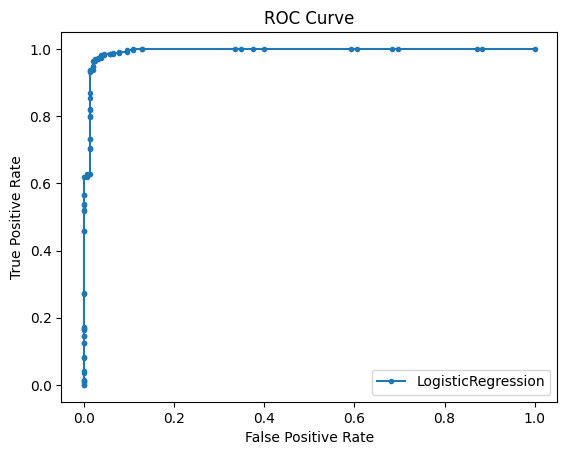


Naive Bayes Evaluation:
Accuracy on training data: 0.9807045097599282
Accuracy on test data: 0.9730941704035875
Precision: 0.9696969696969697
Recall: 1.0
F1-Score: 0.9846153846153847
ROC-AUC Score: 0.9032258064516129
Confusion Matrix:
[[125  30]
 [  0 960]]


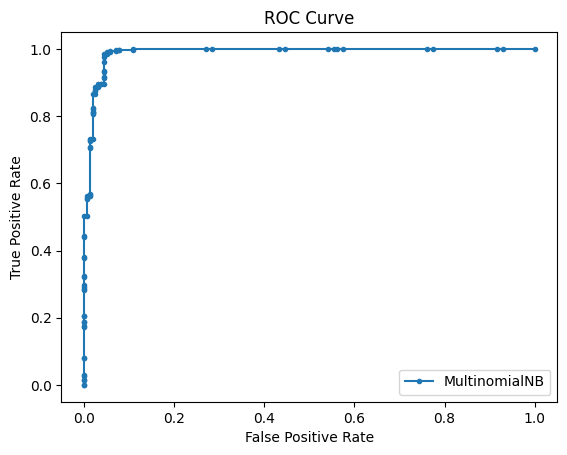


Logistic Regression Prediction: Ham mail
Naive Bayes Prediction: Ham mail


In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Replace null values with a blank string
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data), '')

# Basic EDA: Checking class distribution
print("Class Distribution:")
print(mail_data['Category'].value_counts())

# Visualizing the class distribution
sns.countplot(x='Category', data=mail_data)
plt.title('Spam vs. Ham Distribution')
plt.show()

# Preprocessing: Label spam as 0 and ham as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

# Separating the data into features (X) and labels (Y)
X = mail_data['Message']
Y = mail_data['Category'].astype('int')  # Convert labels to integers

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Transform the text data into feature vectors using TF-IDF
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Model 1: Logistic Regression
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Model 2: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)

# Function to evaluate the models
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(Y_train, train_pred)
    test_accuracy = accuracy_score(Y_test, test_pred)

    # Precision, Recall, F1-Score
    precision = precision_score(Y_test, test_pred)
    recall = recall_score(Y_test, test_pred)
    f1 = f1_score(Y_test, test_pred)

    # Confusion Matrix
    cm = confusion_matrix(Y_test, test_pred)

    # ROC-AUC Score
    roc_auc = roc_auc_score(Y_test, test_pred)

    # Print the results
    print(f'Accuracy on training data: {train_accuracy}')
    print(f'Accuracy on test data: {test_accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC Score: {roc_auc}')
    print(f'Confusion Matrix:\n{cm}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, marker='.', label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Evaluate Logistic Regression
print("\nLogistic Regression Evaluation:")
evaluate_model(model, X_train_features, X_test_features, Y_train, Y_test)

# Evaluate Naive Bayes
print("\nNaive Bayes Evaluation:")
evaluate_model(nb_model, X_train_features, X_test_features, Y_train, Y_test)

# Prediction on new input mail
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# Convert input mail to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Logistic Regression Prediction
lr_prediction = model.predict(input_data_features)
print("\nLogistic Regression Prediction:", "Ham mail" if lr_prediction[0] == 1 else "Spam mail")

# Naive Bayes Prediction
nb_prediction = nb_model.predict(input_data_features)
print("Naive Bayes Prediction:", "Ham mail" if nb_prediction[0] == 1 else "Spam mail")
